In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("../data/headlines_finbert.csv")

# Convert Date to datetime if not already
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

# Create next-day return if not present
if "return_next" not in df.columns:
    df["return_next"] = (df["OP_next"] - df["CP"]) / df["CP"]

df.head()


,Title,Date,OP,CP,OP_next,finbert_label,finbert_neg,finbert_neu,finbert_pos,finbert_confidence,return_next
0,"JPMorgan Predicts 2008 Will Be ""Nothing But Net""",2008-01-02,1468.0,1447.16,1447.5,negative,0.604176,0.207425,0.188399,0.604176,0.000235
1,Dow Tallies Biggest First-session-of-year Poin...,2008-01-02,1468.0,1447.16,1447.5,negative,0.962149,0.026425,0.011426,0.962149,0.000235
2,2008 predictions for the S&P 500,2008-01-02,1468.0,1447.16,1447.5,neutral,0.122815,0.824247,0.052938,0.824247,0.000235
3,"U.S. Stocks Higher After Economic Data, Monsan...",2008-01-03,1447.5,1447.16,1444.0,positive,0.064193,0.074181,0.861626,0.861626,-0.002184
4,U.S. Stocks Climb As Hopes Increase For More F...,2008-01-07,1414.1,1416.18,1415.7,positive,0.165056,0.248378,0.586566,0.586566,-0.000339


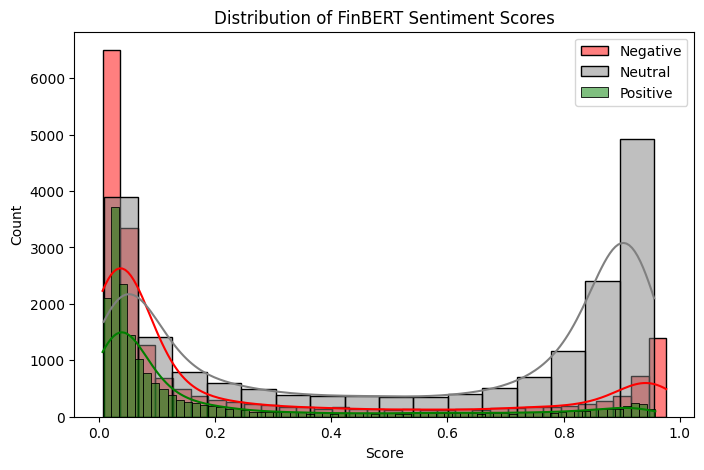

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["finbert_neg"], kde=True, color="red", label="Negative")
sns.histplot(df["finbert_neu"], kde=True, color="gray", label="Neutral")
sns.histplot(df["finbert_pos"], kde=True, color="green", label="Positive")
plt.legend()
plt.title("Distribution of FinBERT Sentiment Scores")
plt.xlabel("Score")
plt.show()


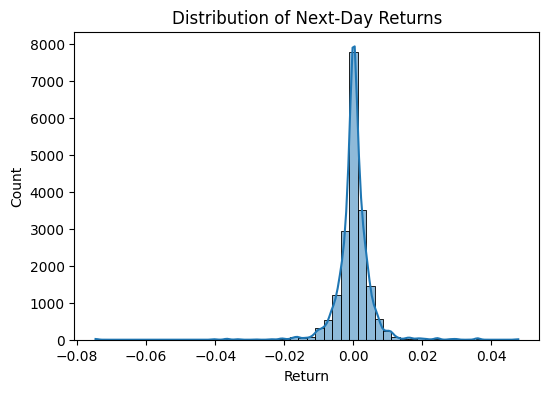

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["return_next"], bins=50, kde=True)
plt.title("Distribution of Next-Day Returns")
plt.xlabel("Return")
plt.show()


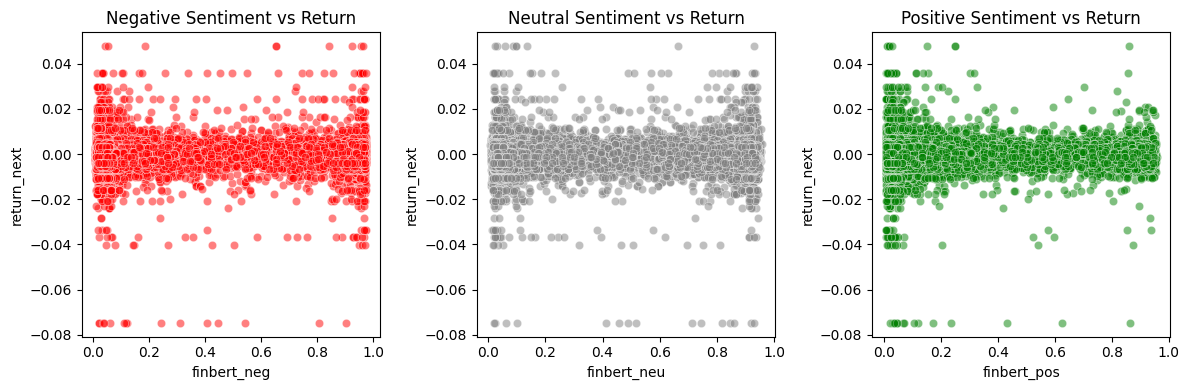

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.scatterplot(x="finbert_neg", y="return_next", data=df, alpha=0.5, color="red")
plt.title("Negative Sentiment vs Return")

plt.subplot(1,3,2)
sns.scatterplot(x="finbert_neu", y="return_next", data=df, alpha=0.5, color="gray")
plt.title("Neutral Sentiment vs Return")

plt.subplot(1,3,3)
sns.scatterplot(x="finbert_pos", y="return_next", data=df, alpha=0.5, color="green")
plt.title("Positive Sentiment vs Return")

plt.tight_layout()
plt.show()


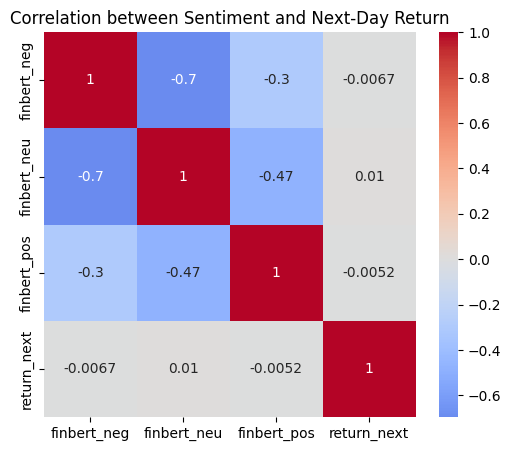

In [12]:
corr = df[["finbert_neg", "finbert_neu", "finbert_pos", "return_next"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Sentiment and Next-Day Return")
plt.show()
